# Welcome to the RedCap API Workshop
---

Hopefully you all have your CAMH RedCap login credentials and have accessed a copy of your API token.
If not, please take care of this before continuing.

## Workshop Outline
---
By the end of this workshop we hope that you will learn what the RedCap API is, and how you can use it for your project.

During this workshop we will cover the following topics:
 1. [What is an API?](#what-is-an-api)
 2. [What is a RESTful API?](#what-is-a-restful-api)
    - GET
    - PUT
    - POST
    - DELETE
    - HTTP Status Code
 3. [RedCap API Playground](#redcap-api-playground)
    - Options for connecting to the API
    - JSON and CSV support
    - Using the API Playgroud GUI
 4. [Using Python with the API](#using-the-redcap-api-with-python)
    - requests and pycap
    - Ex. Export records
    - Ex. Import records
    - Ex. Arms/Events
    - Ex. Reports
    - Ex. Surveys
 5. [Data Analysis and Visualization](#data-analysis-and-visualization)
    - Ex. Using pandas package
    - Ex. Using matplotlib for visualization
    


## <a name="what-is-an-api"></a>What is an API
---
**A**pplication **P**rograming **I**nterfaces (**API**) are a set of functions used to communicate with an application or service. A good analogy I once heard is to think of an API as a menu at a restaurant. If you want to order food from the restaurant, you can read descriptions of each dish form the list of menu items then ask the restaurant staff to serve you that item. It's really not that important *how* the dish was made or served to you. As long as you have a good idea of what to expect from your order. This analogy isn't perfect since you typically can't give ingredients to your server for them to make you a dish, but with API's you can!

In computer parlance, API's define a set of functions that allow you to get data from an application or send data to an application. Most large applications &ndash;including web application&ndash; have API's to which you can communicate. This gives developers a way to interact with an application which can be incredibly useful in many situations.

For example, a researcher studying depression might want to analyze comments on Instagram to see if they can find speech patterns associated with depression. To do this they want to use a machine learning model which needs a huge dataset to train.

From a technical perspective, the first step would be to gather the data to train the model. You could do this by having an RA go and physically copy all the comments by hand, but this would be insanely time consuming and teadious to the point where it wouldn't be worth it. That's where the Instagram API can help. Instead of having your RA copy and paste thousands or millions of comments, they could write a script to scroll through comments and copy them to an excel sheet in an automated way.

To write this script, they would need to use the Instagram API to communicate with the Instagram web application and pull the necessary data. The Instagram API would describe an **endpoint** (typically a URI associated with a resource) that the researcher could use in their script to get a list of comments.

###### Still a bit confused?

Let's look at a ~~real~~ fake example.

Go to the website [petstore.swagger.io](https://petstore.swagger.io/#/).

Here, they have an example API for a fake pet company that has a database of pets. See the table below.

|ID| Name| PhotoUrls|Tags|Status|..|
|---|---|---|---|---|---|
|1|Eagle|https ://...|bird|available|..|
|2|Bunny|https ://...|rodent|unavailable|..|

What if we wanted to find a list of animals available at the pet store? 

Well, luckily, the company has created an API to allow us to retreive this information without getting access to other protected information in the database. The company can control to what data we, as users, have access. They give us a *menu* through which we can *order* data.

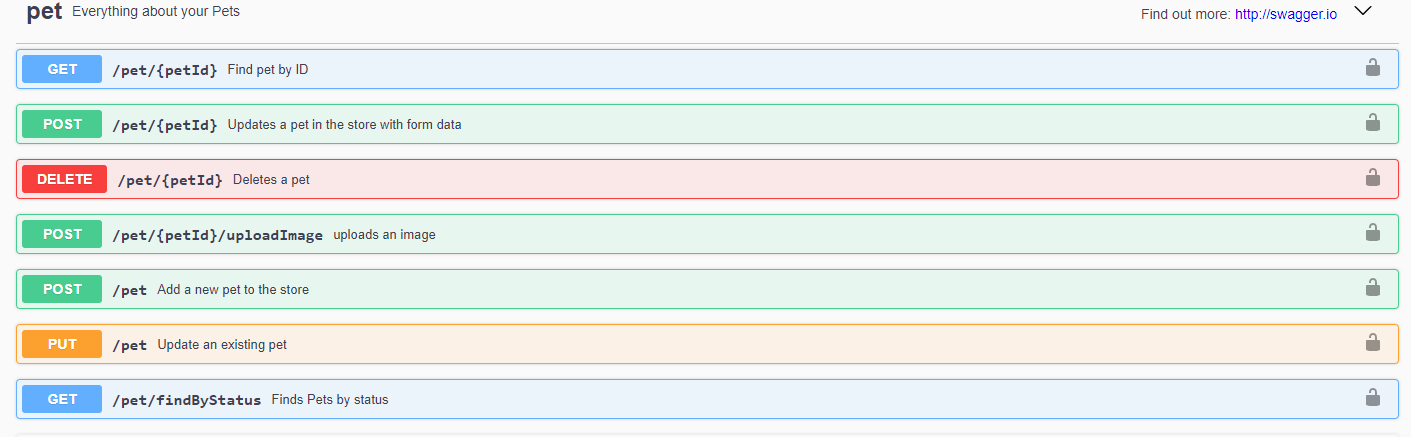

Not only can we *order* data, but through the API we also have the ability to create, update or delete data in the database. How neat is that!

![Alt Text](https://i.imgur.com/eNUYEQT.gif?noredirect)

Hopefully by now you have some idea of what an API *is*.
<br>
In the next section we'll look into some more API specifics.

In [4]:
import requests
from pprint import pprint

r = requests.get('https://petstore.swagger.io/v2/pet/2')
r.json()


{'id': 2,
 'category': {'id': 0, 'name': 'string'},
 'name': 'doggie',
 'photoUrls': ['string'],
 'tags': [{'id': 0, 'name': 'string'}],
 'status': 'available'}

## <a name="what-is-a-restful-api"></a>What is a RESTful API
---
Now that you're starting to form an intuitive sense of what an API *is*, we can start to look at the structure of API's and the standards used by the Web community.

There are many web API types, each define their own rules and best practices for interfacing with web services or applications. For example, those that adhere to [**Simple Object Access Protocol**](https://en.wikipedia.org/wiki/SOAP) (SOAP), or [**Remote Procedure Call**](https://en.wikipedia.org/wiki/Remote_procedure_call) (RPC) architectures are common, however we will focus on the most common API architecture called [**REpresentational State Transfer**](https://en.wikipedia.org/wiki/Representational_state_transfer).

#### RESTful API's
Web services that adhere to REST architecture are deemed RESTful. While REST is an architectural style rather than an actual protocol like SOAP, it makes use of a bunch of common internet standards like HTTP, URI and JSON. The nitty-gritty details of REST definitely aren't required knowledge for anyone looking to use a RESTful API but it's helpfull to know a little bit about how the architecture interfaces users with services.

HTTP based RESTful API's &ndash;like that used by redcap&ndash; are characterized by:
 - A base url
 - Standard HTTP CRUD methods
 
From the example used in the first section, we could make a request through the API by putting together the base url https://petstore.swagger.io/v2/pets/ with the HTTP standard method **GET** to retrieve the data about the collection of pets. Typically, the base url will be comprised of the main url + a version identifier + path/to/an/endpoint as in the example.

#### So what are the HTTP standard CRUD methods?

**CRUD** stands for **C**reate, **R**ead, **U**pdate, and **D**elete. This defines the four actions that an agent can request from the web service. Each action has accompanying *methods* that can be called upon to perform these requests. They're summarized below.

##### Create
<div>
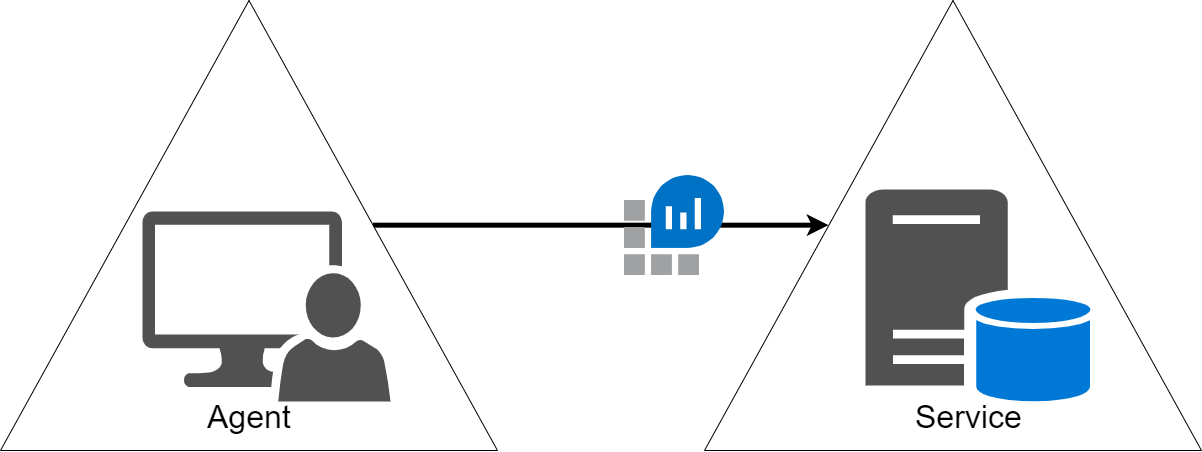
</div>

The **POST** method allows agents (ie. You) to *create* member resources. From the example above, we could have submitted a **POST** request to the web service to *create* a dog (member) in the pets (collection) database. The web service would take care of most of the work that needs to be done to actually create the member in the database &ndash;like assign a unique ID&ndash; we simply have to know the correct API call to request it. Think back to the restaurant menu metaphor. Ring a bell?

##### Read
<div>
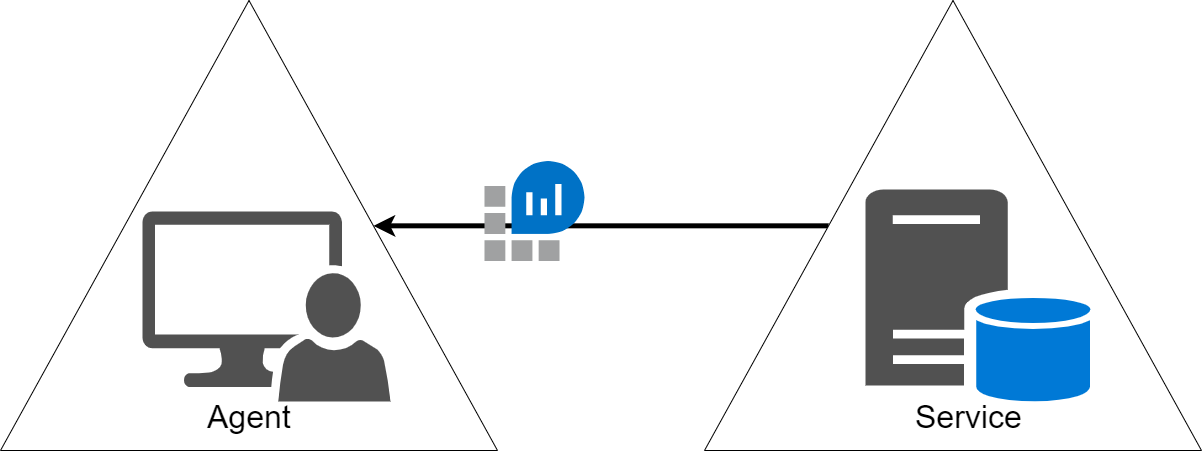
</div>

The **GET** method allows the agent to pull data from the web service &ndash;in other words&ndash; *Read*. In the above example we *read* data from a collection of pets, but we could have also *read* data about the users or the state of the service, etc. In essence, GET requests stipulates a resource payload is flowing from a service to the requesting agent.

![Alt Text](https://media.giphy.com/media/YKLBb9U2Q03Ty/giphy.gif)

##### Update
<div>
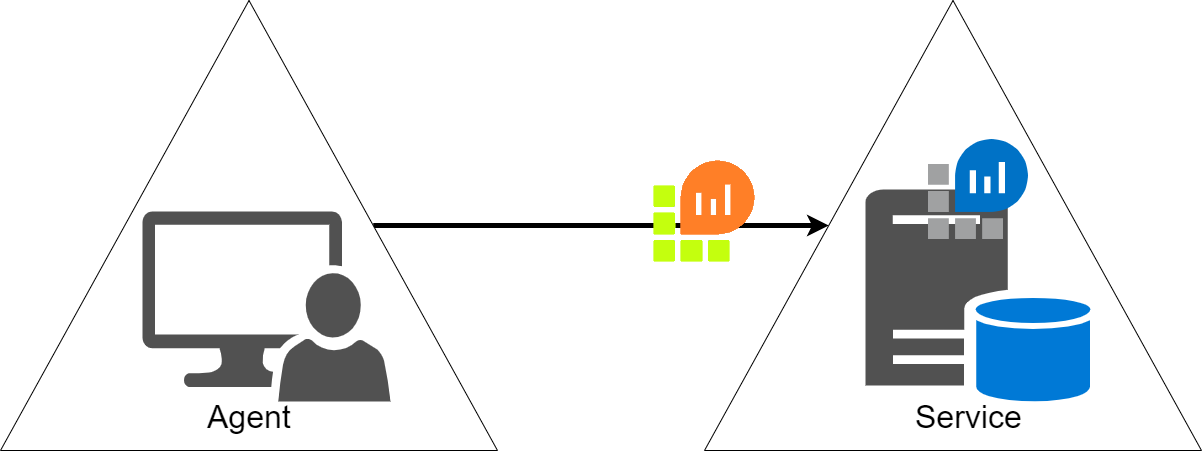
</div>

The **PUT** and **PATCH** methods are both used to *update* a resource via a web service. The more common PUT method is actually used to *replace* the specified resource/s, or create it if it doesn't already exist. The PATCH method differs subtly in that it *updates* the specified resource/s, or it *may* create it if it doesn't exist. If you're resource is a file for example, a PUT would replace the file with a new version, while a PATCH might only modify some part of it.

##### Delete
<div>
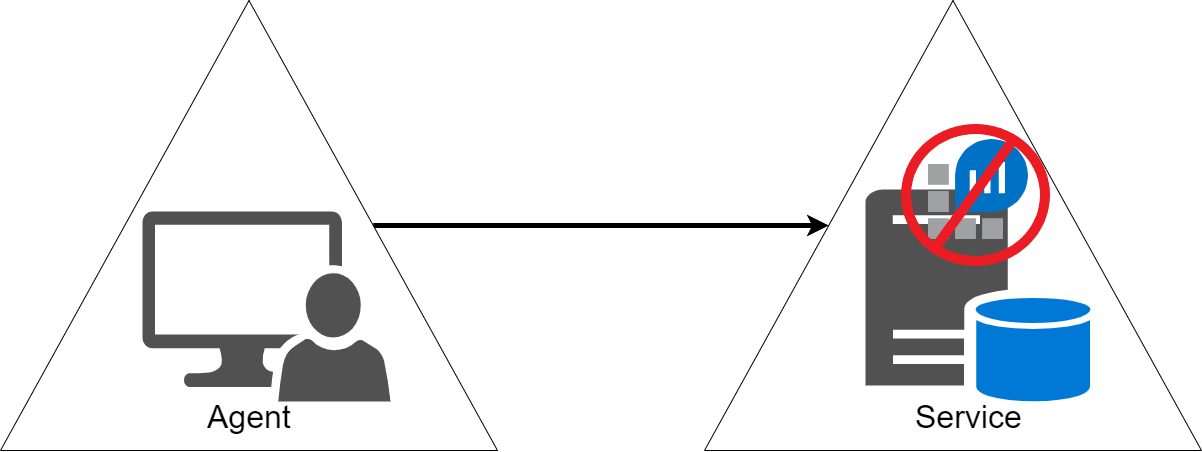
</div>



## <a name="redcap-api-playground"></a>RedCap API Playground
---

## <a name="using-the-redcap-api-with-python"></a>Using RedCap API with Python
---
For this section, since we're using Binder, I will assume that everyone has Python and Anaconda installed. If you're following along outside the Binder, you will need to have Python installed, and some package management system like Anaconda.

To interact with the RedCap API using python, we can either use the **requests** package or the **pycap** package.
**Pycap** is essentially a wrapper around the **requests** package specifically for RedCap. For simplicity, we'll use **pycap** for the remainder of the workshop.

#### Step 1: Install the pycap package
In this Binder tutorial, the python environment is already created for you with pycap installed. Therefore, if you're following along with this Binder you can effectively ignore this step and head to [**Step 2**](#step-2--import-the-packages). However, if you're working in another python environment then it will be necessary to install pycap for that environment. Here we give an example using Anaconda.

From the terminal (Linux & MacOS) or Anaconda prompt (Windows):
```shell
# First create your conda environment
conda create -n redcap-tutorial python=3.7

# Activate the environment you just created
conda activate redcap-tutorial

# Install the pycap package to your environment
pip install pycap
```

#### Step 2: Import the packages
For this tutorial we will only need to import the **pycap** package.

In [6]:
# First we import the redcap (pycap) package so that we can use its functions
import redcap

# Check to see what classes and methods are available for us to use from the redcap package
dir(redcap)

['Project',
 'RCAPIError',
 'RCRequest',
 'RedcapError',
 '__author__',
 '__builtins__',
 '__cached__',
 '__copyright__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'project',
 'request',
 'version']

#### Step 3: Authenticate with an API token
If you don't have your API token saved then navigate back to the project RedCap API playground and copy your API token (a 32 hex string). Then, continue on and run the next few lines of code, after pasting your API token into the api_token variable.

In [5]:
# Define the URL where the project is located and the API token to give us access to it.
url = 'https://edc.camhx.ca/redcap/api/'
api_token = ''  # place your token between these single quotes

# Connect to the project specified by the token and URL
my_project = redcap.Project(url, api_token)

# Print the name of the project
print(my_project.name)

NameError: name 'redcap' is not defined

In [14]:
my_project.name


''

## <a name="data-analysis-and-visualization"></a>Data Analysis and Visualization
---


In [ ]:
import os